# <center>Workflow for on-line GC and HPLC analysis in flow chemistry</center>


---
## Section 0: Imports, Paths, and Logging
---

In this section all the necessary python packages are imported, the path to this notebook and the logger for this notebook is set up.

In [2]:
# Activate autoreload to keep on track with changing modules
%reload_ext autoreload
%autoreload 2

# Import standard libraries
import logging
from pathlib import Path

# Import tools for data processing and analysis and DaRUS upload
from FAIRDaRUS import DaRUS_upload
from FAIRFlowChemistry.tools.logger_setup import setup_logger
from FAIRFlowChemistry.tools import initialize_dataset, reading_raw_data_widget, analyzing_raw_data_widget

# Get root path of the notebook
root = Path.cwd()

# Setup logger
setup_logger( "log_faraday_efficency.log" )
logger = logging.getLogger( "main" )

---
## Section 1: Dataset and raw data
---
In this section the dataset as well as the to analyze raw data is choosen

In [3]:
init_data = initialize_dataset()
init_data.write_dataset( )

/Users/samir/miniconda3/envs/fairflow/lib/python3.11/site-packages/sdRDM/base/datamodel.py:359: UserWarning: No 'URL' and 'Commit' specified. This model might not be re-usable.
  warnings.warn(


In [4]:
## Definition of basic meta data of the project ##

init_data.title.value        = 'FAIRFlow: A Jupyter notebook-based platform for on-line analysis in flow chemistry '
init_data.description.value  = 'The aim of this project is to introduce the FAIR (findable, accessible, interoperable, reusable) principles into miniplant flow chemistry'
init_data.project.value      = 'Project B07'
init_data.purpose.value      = 'This dataset includes various measurements for distinct pore size-ordered mesoporous carbon (OMC) materials, each loaded with 8% Cu. Specifically, the designations 7.1 nm and 9.2 nm denote the respective pore sizes. Notably, our sample preparation involved a comparative study on the impact of washing the sample with H2SO4'



# List with authors and their affiliation #
# init_data.authors.value      = 'Richard Schömig, Jan Range, Samir Darouich, Maximilian Schmidt, Seda Yilmaz, Elias Klemm, Jürgen Pleiss' 
# init_data.affiliations.value = 'University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart'
# init_data.identifier.value   = 'xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx'
# init_data.contact_text.value = 'Jürgen Pleiss, juergen.pleiss@itb.uni-stuttgart.de'

# init_data.related_publication.value = "test, https://id.loc.gov/authorities/subjects/sh2014001146.html"

# init_data.topic_classification.value = "homogeneous catalysis (LCSH), https://id.loc.gov/authorities/subjects/sh2014001146.html"
# init_data.keywords.value             = "polymer chemistry (Loterre Chemistry Vocabulary), https://skosmos.loterre.fr/ERC/en/page/?uri=http%3A%2F%2Fdata.loterre.fr%2Fark%3A%2F67375%2FERC-KCSKD4X9-P"

init_data.dataset_text.value = "datasets/poresize_omc"

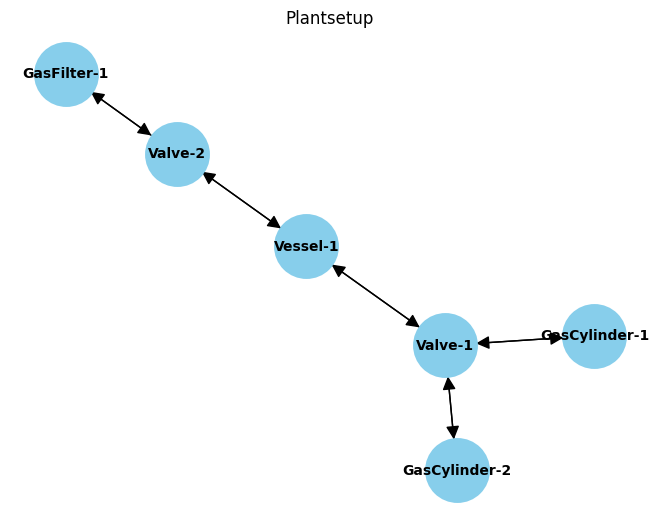

In [8]:
## Search for dataset and raw data ##

rrdw = reading_raw_data_widget()
rrdw.choose_data( root = root, dataset_directory = "datasets" )

In [10]:
rrdw.measurements.value = ["Measurement 1","Measurement 2"]


e_chem = str(root)+'/data/raw_data/9.2_nm/Gammry_Data/230705-1-CV-PEG35-052-GTA25/GSTATIC.DTA'
mfm    = [[str(root)+'/data/raw_data/9.2_nm/MFM_Data/1-CV-PEG35-052-GTA25/GSS_1-CV-PEG35-052-GTA25_200_20c_1h.csv'],
          [str(root)+'/data/raw_data/9.2_nm/MFM_Data/2-CV-PEG35-052-GTA25/GSS_2-CV-PEG35-052-GTA25_200_20c_1h.csv'],]
gc     = [[str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-1-CV-PEG35-052-GTA25/JH-1H 2023-07-05 18-32-59/NV-F0104.D/REPORT01.CSV'],

        [str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/9.2_nm/GC_Data/230705-2-CV-PEG35-052-GTA25/JH-1H 2023-07-05 20-04-01/NV-F0104.D/REPORT01.CSV']]


rrdw.measurements.value = ["Measurement 1","Measurement 2","Measurement 3"]

e_chem = str(root)+'/data/raw_data/7.1_nm_OMC/Gammry_Data/230705-1-CV-PEG20-068-GTA25/GSTATIC.DTA'
mfm    = [[str(root)+'/data/raw_data/7.1_nm_OMC/MFM_Data/1-CV-PEG20-068/MFM_1-CV-PEG20-068.csv'],
          [str(root)+'/data/raw_data/7.1_nm_OMC/MFM_Data/2-CV-PEG20-068-GTA25/GSS_2-CV-PEG20-068-GTA25_200_20c_1h.csv'],
          [str(root)+'/data/raw_data/7.1_nm_OMC/MFM_Data/3-CV-PEG20-068-GTA25/GSS_3-CV-PEG20-068-GTA25_200_20c_1h.csv'] ]
gc     = [[str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-1-CV-PEG20-068-GTA25/JH-1H 2023-07-05 11-45-17/NV-F0104.D/REPORT01.CSV'],

        [str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-2-CV-PEG20-068-GTA25/JH-1H 2023-07-05 14-19-03/NV-F0104.D/REPORT01.CSV'],

        [str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC/GC_Data/230705-3-CV-PEG20-068-GTA25/JH-1H 2023-07-05 15-59-41/NV-F0104.D/REPORT01.CSV']]


rrdw.measurements.value = ["Measurement 1","Measurement 2","Measurement 3"]

e_chem = str(root)+'/data/raw_data/7.1_nm_OMC_washing/Gammry_Data/230706-1-CV-PEG20-068-GTA25-washing/GSTATIC.DTA'
mfm    = [[str(root)+'/data/raw_data/7.1_nm_OMC_washing/MFM_Data/1-CV-PEG20-068-GTA25-washing/GSS_1-CV-PEG20-068-GTA25-washing_200_20c_1h.csv'],
          [str(root)+'/data/raw_data/7.1_nm_OMC_washing/MFM_Data/2-CV-PEG20-068-GTA25-washing/GSS_2-CV-PEG20-068-GTA25-washing_200_20c_1h.csv'],
          [str(root)+'/data/raw_data/7.1_nm_OMC_washing/MFM_Data/3-CV-PEG20-068-GTA25-washing/GSS_3-CV-PEG20-068-GTA25-washing_200_20c_1h.csv'] ]
gc     = [[str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-1-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 09-26-39/NV-F0104.D/REPORT01.CSV'],

        [str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-2-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 11-05-18/NV-F0104.D/REPORT01.CSV'],

        [str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0102.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0102.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0103.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0103.D/REPORT01.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0104.D/report00.CSV',
        str(root)+'/data/raw_data/7.1_nm_OMC_washing/GC_Data/230706-3-CV-PEG20-068-GTA25-washing/JH-1H 2023-07-06 12-32-22/NV-F0104.D/REPORT01.CSV']]

for i,obj in enumerate(rrdw.measurement_objects):
    obj.potentio_files.value = [e_chem] if i == 0 else []
    obj.GC_files.value      = gc[i]
    obj.MFM_files.value     = mfm[i]

rrdw.pid_file.value     = str(root)+'/data/DEXPI/DEXPI_PID.xml'
rrdw.species_file.value = str(root)+'/data/additional_data/species_data.yaml'

---
## Section 2: Analysis of data
---
In this section the raw data of the above choosen dataset is analyzed (if you change the dataset above, then reexecute this cell)

In [7]:
# Provide a typical retention time dictionary to pre assign retention times 

typical_retention_time = {"Hydrogen": 1.7, "Carbon dioxide": 3.0, "Carbon monoxide": 13.6, 
                          "Methane": 3.6, "Ethene": 6.0, "Ethane": 7.1}

ardw = analyzing_raw_data_widget()
ardw.choose_experiment( dataset = rrdw.dataset, 
                        dataset_path = rrdw.dataset_dropdown.value, 
                        typical_retention_time = typical_retention_time)

AttributeError: 'reading_raw_data_widget' object has no attribute 'dataset'

---
## Section 3: Upload of data to DaRUS
---
In this section the above choosen dataset, containing the processed as well as the raw data, is uploaded to DaRUS

In [ ]:
# Predefined list of all SFB1333 dataverses. If a new dataverse wants to be appended, just add in the list
sfb1333_dataverse_list = [ "sfb1333-"+group_name for group_name in ["hansen-gross", "grabowski", "sarkar", "tallarek", "peters", "schmitz", "inf", "pluhackova", "giesselmann", "klemm", "schlaich", "traa", "naumann", "lotsch", "vanSlageren", "holm", "fyta", "estes", "laschat", "bruckner", "bill", "ludwigs", "dyballa", "ringenberg", "kaestner", "Buchmeiser", "sottmann"] ]

uploader = DaRUS_upload()
uploader.DaRUS( dataverse_list = sfb1333_dataverse_list )

uploader.api_token_text.value = "4afecd82-c92d-4935-b786-2225af43531e"
uploader.depositor_text.value = "Samir Darouich"

Attribute project not valid for import (dv_up).
Dataset with pid 'doi:10.18419/darus-4076' created.

📝 Preparing upload

🔎 Checking dataset files              
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ File              ┃ Status ┃ Action ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ poresize_omc.json │ New    │ Upload │
└───────────────────┴────────┴────────┘

⚠️  Direct upload not supported. Falling back to Native API.

🚀 Uploading files

poresize_omc.json ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

✅ Upload complete

https://darus.uni-stuttgart.de//dataset.xhtml?persistentId=doi:10.18419/darus-4076


In [24]:
uploader.citation.title.value = 'FAIRFlow: A Jupyter notebook-based platform for on-line analysis in flow chemistry '
uploader.citation.description.value  = 'The aim of this project is to introduce the FAIR (findable, accessible, interoperable, reusable) principles into miniplant flow chemistry'
uploader.citation.project.value      = 'Project B07'

uploader.citation.authors.value      = 'Richard Schömig, Samir Darouich, Jan Range, Maximilian Schmidt, Seda Yilmaz, Elias Klemm, Jürgen Pleiss' 
uploader.citation.affiliations.value = 'University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart, University of Stuttgart'
uploader.citation.identifier.value   = 'xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx, xxx-xxx-xxx-xxx'
uploader.citation.contact_text.value = 'Jürgen Pleiss, juergen.pleiss@itb.uni-stuttgart.de'

uploader.citation.related_publication.value = "test, https://id.loc.gov/authorities/subjects/sh2014001146.html"

uploader.citation.topic_classification.value = "homogeneous catalysis (LCSH), https://id.loc.gov/authorities/subjects/sh2014001146.html"
uploader.citation.keywords.value             = "polymer chemistry (Loterre Chemistry Vocabulary), https://skosmos.loterre.fr/ERC/en/page/?uri=http%3A%2F%2Fdata.loterre.fr%2Fark%3A%2F67375%2FERC-KCSKD4X9-P"

uploader.file_directoy_input.value = "datasets/poresize_omc.json"